In [1]:
import pandas as pd
import sys
import csv
import os
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
default_color = "#2171b5"
csv.field_size_limit(sys.maxsize)

os.chdir('../Data/Seattle/')

In [2]:
df_review = pd.read_csv('seattle_reviews.csv', sep=None,engine='python')
df_rest = pd.read_csv('seattle_restaurants.csv', sep=None,engine='python')
df_insp = pd.read_csv('seattle_instances_mergerd.csv', sep=None,engine='python')

# Data Cleaning 

In [3]:
def clean(df_review,df_insp):
    
    # Convert to datetime object
    df_insp.inspection_period_start_date = pd.to_datetime(df_insp.inspection_period_start_date)
    df_insp.inspection_period_end_date = pd.to_datetime(df_insp.inspection_period_end_date)
    df_review.review_date = pd.to_datetime(df_review.review_date)

    df_insp['inspection_year'] = df_insp["inspection_period_end_date"].dt.year
    df_insp['inspection_month'] = df_insp["inspection_period_end_date"].dt.month

    # Remove inpection_score = -1 outlier
    df_insp = df_insp[df_insp.inspection_penalty_score >= 0]
    
    # Merge inspection data with review
    df_merge = pd.merge(df_insp, df_review, on="restaurant_id", how="left")
    
    # Only care about reviews that is commented within inspection rage
    review_lower = (df_merge.review_date >= df_merge.inspection_period_start_date)
    review_upper = (df_merge.review_date <= df_merge.inspection_period_end_date)
    df_merge = df_merge[review_lower & review_upper]
    
    return {'merge':df_merge, 'insp':df_insp, 'review':df_review}

In [4]:
df_review = clean(df_review,df_insp)['review']
df_insp = clean(df_review,df_insp)['insp']
df_merge = clean(df_review,df_insp)['merge']

In [5]:
df_review.shape

(283740, 7)

In [6]:
df_insp.shape

(13298, 15)

In [30]:
df_merge

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,...,average_review_rating,review_contents,inspection_year,inspection_month,review_id,user_id,locality,review_date,rating,content
10,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06,2012-10-02,0,22.384615,35,"['Japanese', 'Restaurants']",98116,1,...,5.000000,We went here this past weekend with zero expec...,2012,10,review_Q9_9A9QmmpX4unYRcEQc8g,iU3Vwjf1ZJUl5r_Ha2jjbA,Seattle,2012-02-20,5.0,We went here this past weekend with zero expec...
27,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,...,4.000000,Lots of young families . Kind of sparse &#160;...,2012,2,review_IveKyEloRTk8bHJ8xcpalA,3SSp4anHG1zPxurm8ahwfA,Seattle,2012-01-01,4.0,Lots of young families . Kind of sparse &#160;...
36,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,...,4.000000,Lots of young families . Kind of sparse &#160;...,2012,2,review_1pIZlx4k7U8S-_dX-kzb4w,BKYMMC-DAPY-Oo14tdWA0A,Seattle,2011-11-15,4.0,Our favorite teriyaki in West Seattle! Generou...
45,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,...,4.000000,Lots of young families . Kind of sparse &#160;...,2012,2,review_iaieVt5Tm_US0LTsHMSC6Q,lBPuoOFE7jRMpgvj40A1lQ,Seattle,2011-11-13,4.0,Seattle has a lot of great teriyaki. &#160;Thi...
54,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_WxjHfhYRD3heTI6ETb7sdg,01jx8LovEJpYkaDAg5-g_A,Seattle,2011-01-26,4.0,This place is a gem! My husband and I didn't h...
57,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_zTunv8SyK5YngBzFEvGQMw,hiZz6iax83Zb23xX8zTpzA,Seattle,2011-09-02,5.0,"Looks like a dive, tastes divine! I wish someo..."
59,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_18oexJSjrbelG1IFx-xC_g,N4n4CvVzA2YJsyfntNWqAA,Seattle,2011-08-17,4.0,I thought I walked into a two lane bowling all...
64,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_GO-sVPYCwt0nAG6sINz2hg,7V_moIuZ_Q-7q2OIrsAjnA,Seattle,2011-03-10,4.0,You know- sometimes (especially if you spend a...
66,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_IgpSP4MK3kzzeYVdrkbhvg,FVhJiWya18uDpU77NNXEjA,Seattle,2011-01-11,5.0,Best Teriyaki In West Seattle! &#160;Food is f...
69,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,...,4.428571,This place is a gem! My husband and I didn't h...,2011,11,review_j1_13Ca62XLQlkDCVo2dfw,gTkv7lrMUo3PlID2Qc1FhA,Seattle,2011-03-12,5.0,"I didn't initially want to eat here, because a..."


In [29]:
df_merge.to_csv("individual_review_inspection_merged.csv")

# Data Exploration - Inspection

In [10]:
df = df_insp.iloc[::1]

In [11]:
df.head()

,inspection_id,restaurant_id,inspection_period_start_date,inspection_period_end_date,inspection_penalty_score,inspection_average_prev_penalty_scores,inspection_prev_penalty_score,cuisines,zip_code,review_count,non_positive_review_count,average_review_rating,review_contents,inspection_year,inspection_month
0,DA2383404,ZriNDCVxkCdVEO-X2sjHFw,2012-02-06,2012-10-02,0,22.384615,35,"['Japanese', 'Restaurants']",98116,1,0,5.000000,We went here this past weekend with zero expec...,2012,10
1,DA2304227,ZriNDCVxkCdVEO-X2sjHFw,2011-11-03,2012-02-06,0,23.272727,40,"['Japanese', 'Restaurants']",98116,3,0,4.000000,Lots of young families . Kind of sparse &#160;...,2012,2
2,DA2278690,ZriNDCVxkCdVEO-X2sjHFw,2011-01-06,2011-11-03,40,21.600000,10,"['Japanese', 'Restaurants']",98116,7,0,4.428571,This place is a gem! My husband and I didn't h...,2011,11
3,DA2183562,ZriNDCVxkCdVEO-X2sjHFw,2010-08-26,2011-01-06,10,22.888889,25,"['Japanese', 'Restaurants']",98116,3,1,3.333333,"Honestly, my expectations were not that high. ...",2011,1
4,DA2142912,ZriNDCVxkCdVEO-X2sjHFw,2010-02-25,2010-08-26,25,22.625000,0,"['Japanese', 'Restaurants']",98116,4,2,3.250000,"Yep, like it says.My friend and I were on the ...",2010,8


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 13298
Data columns (total 15 columns):
inspection_id                             13298 non-null object
restaurant_id                             13298 non-null object
inspection_period_start_date              13298 non-null datetime64[ns]
inspection_period_end_date                13298 non-null datetime64[ns]
inspection_penalty_score                  13298 non-null int64
inspection_average_prev_penalty_scores    13298 non-null float64
inspection_prev_penalty_score             13298 non-null int64
cuisines                                  13298 non-null object
zip_code                                  13298 non-null int64
review_count                              13298 non-null int64
non_positive_review_count                 13298 non-null int64
average_review_rating                     13298 non-null float64
review_contents                           13298 non-null object
inspection_year                           1329

In [13]:
df.inspection_year.value_counts()

2012    3174
2011    2578
2010    2067
2009    1781
2008    1407
2007    1094
2006     704
2013     493
Name: inspection_year, dtype: int64

In [14]:
df.inspection_month.value_counts()

3     1630
1     1598
2     1478
4     1275
10    1044
5     1036
6     1011
12     982
11     889
7      812
8      782
9      761
Name: inspection_month, dtype: int64

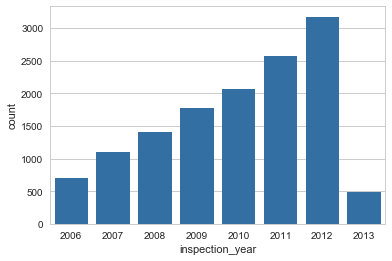

In [15]:
sns.countplot(x=df.inspection_year, data=df, color=default_color)

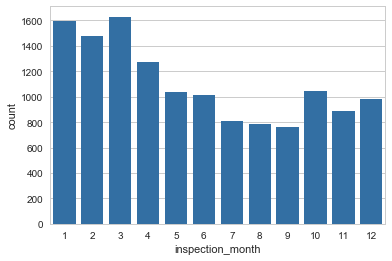

In [16]:
sns.countplot(x=df.inspection_month, data=df, color=default_color)

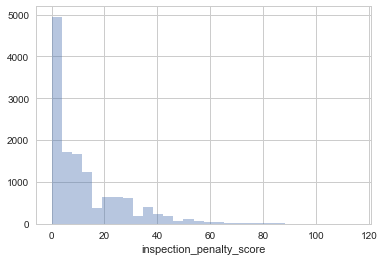

In [17]:
sns.distplot(df.inspection_penalty_score, bins=30, kde=False, rug=False)

In [18]:
rest_count = df.restaurant_id.value_counts()

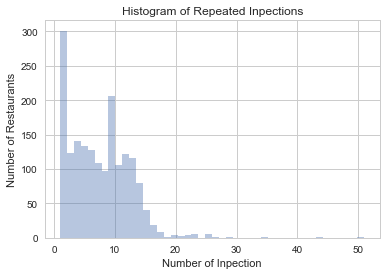

In [19]:
# Repeated inspection
g = sns.distplot(rest_count, kde=False)
g.set(xlabel='Number of Inpection', ylabel='Number of Restaurants')
plt.title("Histogram of Repeated Inpections")
plt.show(g)

In [25]:
df[df["inspection_penalty_score"] > 70][["average_review_rating","inspection_penalty_score"]].corr(method= 'spearman')

,average_review_rating,inspection_penalty_score
average_review_rating,1.000000,-0.037521
inspection_penalty_score,-0.037521,1.000000


## Review rating is not informative!

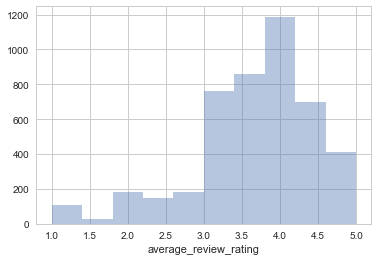

In [20]:
# No code violation restaurant
sns.distplot(df[df["inspection_penalty_score"] == 0]["average_review_rating"], bins = 10,kde=False)

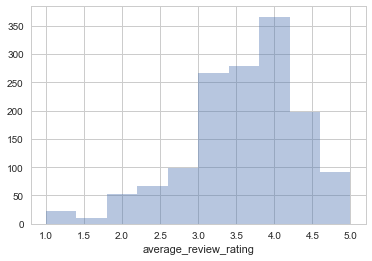

In [21]:
sns.distplot(df[df["inspection_penalty_score"] > 30]["average_review_rating"], bins = 10,kde=False)

In [27]:
corr = []
thresholds = [0,10,20,30,40,50,60,70]
for i in thresholds:
    corr_table = df[df["inspection_penalty_score"] > i][["average_review_rating","inspection_penalty_score"]].corr(method= 'spearman')
    corr.append(corr_table.iloc[0][1])

In [28]:
pprint(corr)

[-0.02207259746033036,
 -0.002188622860368267,
 -0.010485875793782986,
 -0.033408624862005194,
 -0.0022896343873826351,
 0.032434853142697395,
 0.063462949769724095,
 -0.037520661438255151]


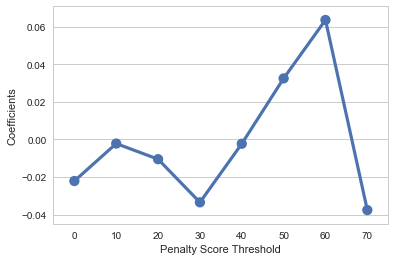

In [48]:
g = sns.pointplot(thresholds, corr)
g.set(xlabel='Penalty Score Threshold', ylabel='Coefficients')
g

**Weird that penalty score positively correlated with average rating**

## Review Count (Positive corr)

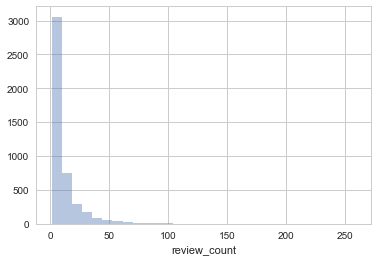

In [49]:
sns.distplot(df[df["inspection_penalty_score"] == 0]["review_count"], bins = 30,kde=False)

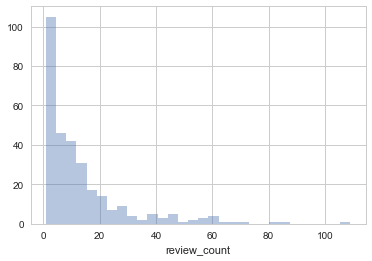

In [50]:
sns.distplot(df[df["inspection_penalty_score"] > 50]["review_count"], bins = 30,kde=False)

In [51]:
corr = []
thresholds = [0,10,20,30,40,50,60]
for i in thresholds:
    corr_table = df[df["inspection_penalty_score"] > i][["review_count","inspection_penalty_score"]].corr(method= 'spearman')
    corr.append(corr_table.iloc[0][1])

In [52]:
corr

[0.060375041888524425,
 0.07187192947139126,
 0.064799403275717163,
 0.10394483434604006,
 0.067261105878299587,
 0.087246704017423821,
 0.042924595264368377]

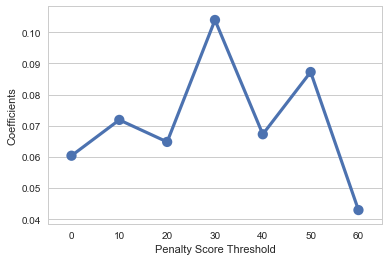

In [53]:
g = sns.pointplot(thresholds, corr)
g.set(xlabel='Penalty Score Threshold', ylabel='Coefficients')
g

## Geo Distribution

In [ ]:
import geopandas as gpd

In [ ]:
map = gpd.read_file("Seattle/zip-codes.geojson")

In [ ]:
map['GEOID10'] = pd.to_numeric(map['GEOID10'])

In [ ]:
vc = df[df["inspection_penalty_score"] > 0]["zip_code"].value_counts()
counts = pd.DataFrame({'GEOID10':vc.index, 'count':vc.values})

In [ ]:
heatmap = pd.merge(map, counts, on = "GEOID10",how="left")

In [ ]:
heatmap.plot(column='count',cmap='BuPu')